In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe(include = 'all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [6]:
#Cleaning data: Dropping unnecessary columns
df.drop(['laptop_ID', 'Product'], axis=1, inplace=True)

In [7]:
df = df.drop(['ScreenResolution', 'Inches'], axis=1)

In [8]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [9]:
#Converting price_euro to price_sgd
conversion_rate = 1.45

In [10]:
df['Price_SGD'] = df['Price_euros'] * 1.45
df.drop('Price_euros', axis=1, inplace=True)

In [11]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_SGD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1942.5505
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1303.4630
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,833.7500
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,3679.3025
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,2615.2200
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,925.1000
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,2173.5500
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,332.0500
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,1107.8000


In [12]:
#Check for missing data
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)


Missing values per column:
 Company      0
TypeName     0
Cpu          0
Ram          0
Memory       0
Gpu          0
OpSys        0
Weight       0
Price_SGD    0
dtype: int64


In [13]:
#Remove GB and convert to integer
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

#Remove kg and convert to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_SGD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1942.5505
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1303.4630
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,833.7500
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3679.3025
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2615.2200
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,925.1000
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,2173.5500
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,332.0500
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,1107.8000


In [14]:
#check for duplicates
print("Duplicate rows found:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate rows found: 30


In [15]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_SGD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1942.5505
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1303.4630
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,833.7500
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3679.3025
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2615.2200
...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,1044.4640
1270,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,925.1000
1271,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,2173.5500
1272,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,332.0500


c:\Users\nazri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


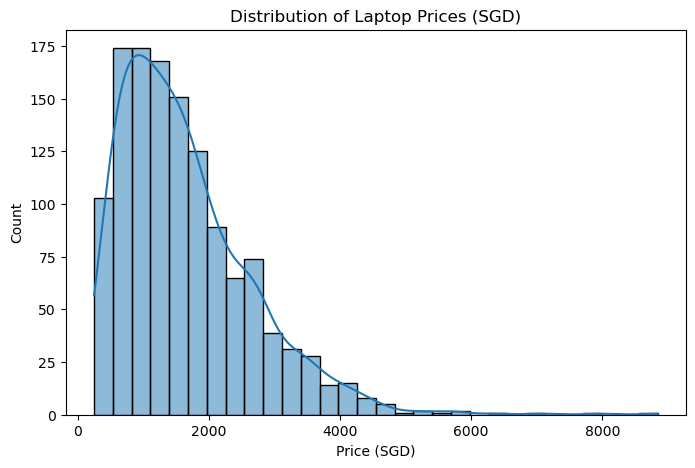

In [16]:
#Distribution of price

plt.figure(figsize=(8,5))
sns.histplot(df['Price_SGD'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices (SGD)')
plt.xlabel('Price (SGD)')
plt.ylabel('Count')
plt.show()

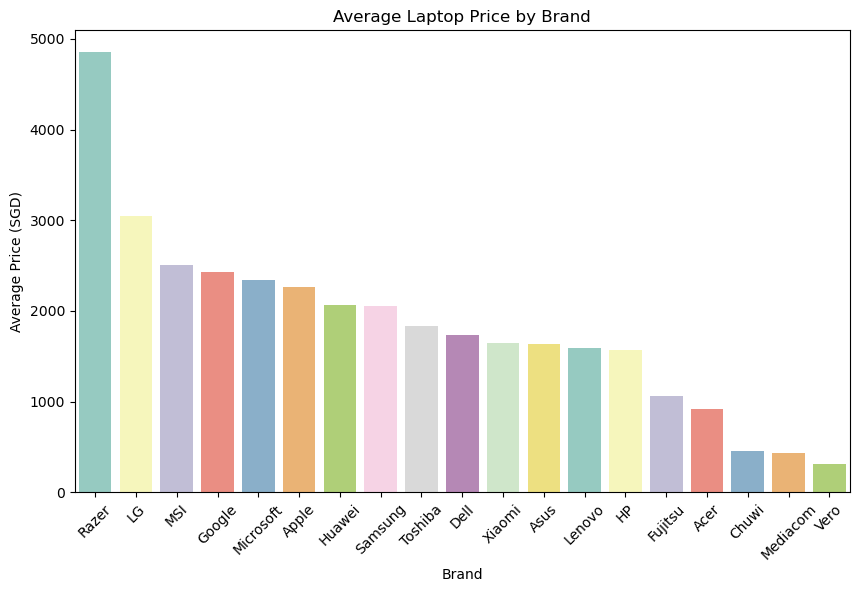

In [17]:
#Bar plot of average price by brand

plt.figure(figsize=(10,6))
brand_avg = df.groupby('Company')['Price_SGD'].mean().sort_values(ascending=False)
sns.barplot(x=brand_avg.index, y=brand_avg.values, palette='Set3')
plt.title('Average Laptop Price by Brand')
plt.ylabel('Average Price (SGD)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

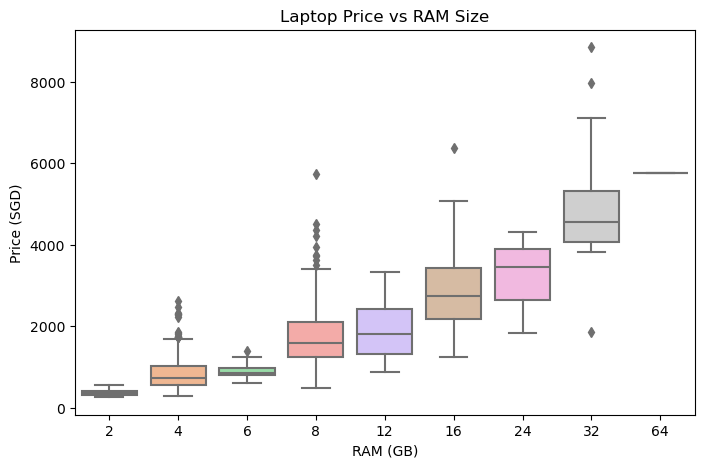

In [18]:
#box and whisker of type vs price

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Ram', y='Price_SGD', palette='pastel')
plt.title('Laptop Price vs RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (SGD)')
plt.show()

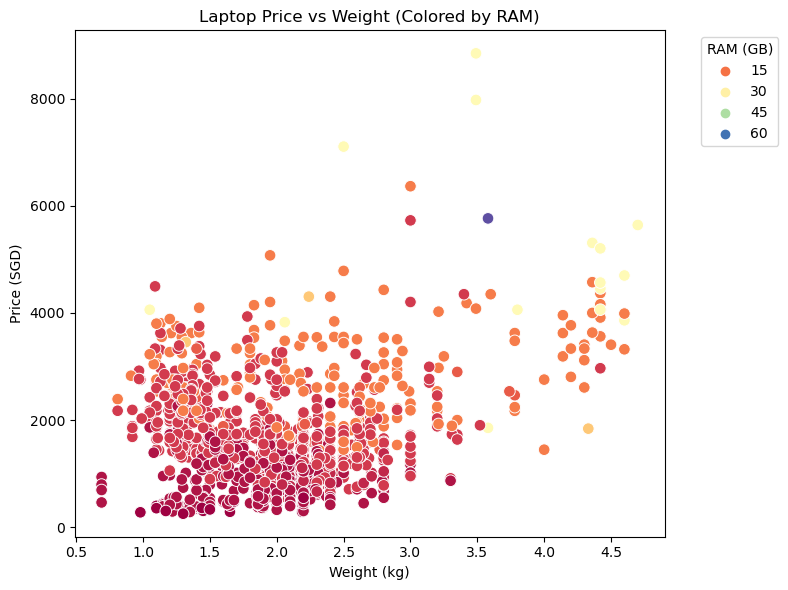

In [19]:
#Scatter plot of weight vs price 

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Weight', y='Price_SGD', hue='Ram', palette='Spectral', s=70)
plt.title('Laptop Price vs Weight (Colored by RAM)')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (SGD)')
plt.legend(title='RAM (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
#Doing OHE
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [22]:
X = df_encoded.drop(['Price_SGD'], axis=1)
y = df_encoded['Price_SGD']

In [23]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [24]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Random Forest
rfr = RandomForestRegressor(random_state=8)
rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_test)

#Decision Tree
dtr = DecisionTreeRegressor(random_state=8)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)

In [25]:
#Evaluating the models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("R² Score:", round(r2_score(y_true, y_pred), 4))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


--- Linear Regression ---
R² Score: -6.036737973351654e+20
MAE: 3427596966505.15
RMSE: 22176387459473.56

--- Random Forest ---
R² Score: 0.8425
MAE: 244.46
RMSE: 358.21

--- Decision Tree ---
R² Score: 0.7059
MAE: 306.19
RMSE: 489.48


In [26]:
#After removing screen resolution and inches, the linear regression model performed worst with an R² score, MAE, and RMSE increased to -6.0367. This is due to the reduce in the number of features, model is likely too simple and underfitted, need to make the model more complicated? add features, hper para tuning to increase max depth
#No change in RFR and DT, but RFR is best suited

#DROP DOWN IDEA

In [27]:
# Create a mock data sample for testing

mock_data = {
    'Company': ['HP'],
    'TypeName': ['Notebook'],
    'Ram': [8],  # in GB
    'Weight': [1.75],  # in kg
    'OpSys': ['Windows 10'],
    'Cpu': ['Intel Core i5 7200U 2.5GHz'],
    'Gpu': ['Intel HD Graphics 620'],
    'Memory': ['256GB SSD']
}
mock_df = pd.DataFrame(mock_data)


# Apply the same preprocessing as the main data
mock_df['Ram'] = mock_df['Ram'].astype(int)
mock_df['Weight'] = mock_df['Weight'].astype(float)

# One-hot encode using the columns from training data
mock_df_encoded = pd.get_dummies(mock_df)
mock_df_encoded = mock_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict with Random Forest Regressor
predicted_price = rfr.predict(mock_df_encoded)
print(f"Predicted Price (SGD): {predicted_price[0]:.2f}")



Predicted Price (SGD): 1528.58


In [28]:
print([col for col in X_train.columns if 'Cpu' in col])
print([col for col in X_train.columns if 'OpSys' in col])


['Cpu_AMD A10-Series 9620P 2.5GHz', 'Cpu_AMD A10-Series A10-9620P 2.5GHz', 'Cpu_AMD A12-Series 9700P 2.5GHz', 'Cpu_AMD A12-Series 9720P 2.7GHz', 'Cpu_AMD A12-Series 9720P 3.6GHz', 'Cpu_AMD A4-Series 7210 2.2GHz', 'Cpu_AMD A6-Series 7310 2GHz', 'Cpu_AMD A6-Series 9220 2.5GHz', 'Cpu_AMD A6-Series 9220 2.9GHz', 'Cpu_AMD A6-Series A6-9220 2.5GHz', 'Cpu_AMD A8-Series 7410 2.2GHz', 'Cpu_AMD A9-Series 9410 2.9GHz', 'Cpu_AMD A9-Series 9420 2.9GHz', 'Cpu_AMD A9-Series 9420 3GHz', 'Cpu_AMD A9-Series A9-9420 3GHz', 'Cpu_AMD E-Series 6110 1.5GHz', 'Cpu_AMD E-Series 7110 1.8GHz', 'Cpu_AMD E-Series 9000 2.2GHz', 'Cpu_AMD E-Series 9000e 1.5GHz', 'Cpu_AMD E-Series E2-6110 1.5GHz', 'Cpu_AMD E-Series E2-9000 2.2GHz', 'Cpu_AMD E-Series E2-9000e 1.5GHz', 'Cpu_AMD FX 8800P 2.1GHz', 'Cpu_AMD FX 9830P 3GHz', 'Cpu_AMD Ryzen 1600 3.2GHz', 'Cpu_AMD Ryzen 1700 3GHz', 'Cpu_Intel Atom X5-Z8350 1.44GHz', 'Cpu_Intel Atom Z8350 1.92GHz', 'Cpu_Intel Atom x5-Z8300 1.44GHz', 'Cpu_Intel Atom x5-Z8350 1.44GHz', 'Cpu_Intel

In [29]:
#Hyper para tuning
rfr = RandomForestRegressor(max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf = 1,
                            min_samples_split=2,
                            n_estimators=100,
                            random_state=8,)

rfr.fit(X_train, y_train)

mae=np.mean(round(np.abs(rfr.predict(X_test) - y_test)))
mse=np.mean(round((rfr.predict(X_test) - y_test)**2))
rmse=np.sqrt(round(mse))

print(f"RFR MAE: {mae:.2f}, RFR MSE: {mse:.2f}, RFR RMSE: {rmse:.2f}")

RFR MAE: 320.65, RFR MSE: 165916.53, RFR RMSE: 407.33


In [30]:
dtr = DecisionTreeRegressor (max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf = 1,
                            min_samples_split=2,
                            random_state=8,)

dtr.fit(X_train, y_train)

mae=np.mean(round(np.abs(dtr.predict(X_test) - y_test)))
mse=np.mean(round((dtr.predict(X_test) - y_test)**2))
rmse=np.sqrt(round(mse))

print(f"DTR MAE: {mae:.2f}, DTR MSE: {mse:.2f}, DTR RMSE: {rmse:.2f}")

DTR MAE: 461.14, DTR MSE: 410878.97, DTR RMSE: 641.00


In [31]:
#GridSeacrh Cross Validation
from sklearn.model_selection import GridSearchCV

param_grid_et = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}


In [32]:
grid_search_et= GridSearchCV(estimator= RandomForestRegressor(random_state=8),
                             param_grid=param_grid_et, cv = 5,
                             scoring='neg_mean_squared_error')

In [ ]:
#Training for GridSearch (RFR)
grid_search_et.fit(X_train, y_train)

In [ ]:
best_params_et= grid_search_et.best_params_
print("Best parameters for Random Forest Regressor:", best_params_et)
best_etr=grid_search_et.best_estimator_

Best parameters for Random Forest Regressor: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
#GridSeacrh Cross Validation
from sklearn.model_selection import GridSearchCV

param_grid_et = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}


In [ ]:
grid_search_et= GridSearchCV(estimator= DecisionTreeRegressor(random_state=8),
                             param_grid=param_grid_et, cv = 5,
                             scoring='neg_mean_squared_error')

In [ ]:
#Training for GridSearch (DTR)
grid_search_et.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=8),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_et= grid_search_et.best_params_
print("Best parameters for Decision Tree Regressor:", best_params_et)
best_etr=grid_search_et.best_estimator_

Best parameters for Decision Tree Regressor: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [60]:
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


In [64]:

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),   
    'min_samples_leaf': randint(1, 11),    
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],    
}   


In [65]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=8),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)



In [66]:
#Training for RandomSearch (RFR)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=8),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026139721A10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002613BAF1290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000261320B8850>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [67]:
best_params_et= random_search.best_params_
print("Best parameters for Random Forest Regressor:", best_params_et)
best_etr=grid_search_et.best_estimator_

Best parameters for Random Forest Regressor: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 153}


In [ ]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': [None, 'sqrt', 'log2'],
}

In [71]:
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=8),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)



In [ ]:
#Training for RandomSearch (DTR)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=8),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002613BB83ED0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002613972AF50>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [73]:
best_params_et= random_search.best_params_
print("Best parameters for Decision Tree Regressor:", best_params_et)
best_etr=grid_search_et.best_estimator_

Best parameters for Decision Tree Regressor: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 3}
